<a href="https://colab.research.google.com/github/mantrala1/DataScienceprojects/blob/master/travel_package_prediction_bagging_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary Packages 

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import os

os.chdir('/Users/sriharithamantrala/Desktop/AIML/Ensemble')

In [ ]:
# read the excel workbook
travel = pd.read_excel(r'Tourism.xlsx', sheet_name='Tourism')

In [ ]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
travel.shape

(4888, 20)

In [ ]:
# Print the first few rows 
travel.head().T

,0,1,2,3,4
CustomerID,200000,200001,200002,200003,200004
ProdTaken,1,0,1,0,0
Age,41.0,49.0,37.0,33.0,NaN
TypeofContact,Self Enquiry,Company Invited,Self Enquiry,Company Invited,Self Enquiry
CityTier,3,1,1,1,1
DurationOfPitch,6.0,14.0,8.0,9.0,8.0
Occupation,Salaried,Salaried,Free Lancer,Salaried,Small Business
Gender,Female,Male,Male,Female,Male
NumberOfPersonVisiting,3,3,3,2,2
NumberOfFollowups,3.0,4.0,4.0,3.0,3.0


In [ ]:
# Check if there is null data 
travel.isnull().sum()


CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [ ]:
travel.describe().T

# Max values for DurationOfPitch, MonthlyIncome, NumberOfTrips are way different from 75th percentile indicating these are good columns 
# of outlier correction.

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [ ]:
# Print the distribution of the variables.
for i in travel.columns:
    if travel[i].dtypes =='float64' or travel[i].dtypes == 'int64':
        if i != 'CustomerID':
            print(i + "=======:")
            print(travel[i].value_counts(normalize=True))
        

ProdTaken=======:
0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64
Age=======:
35.0    0.050837
36.0    0.049550
34.0    0.045260
31.0    0.043544
30.0    0.042686
32.0    0.042257
33.0    0.040541
37.0    0.039683
29.0    0.038181
38.0    0.037752
41.0    0.033248
39.0    0.032175
28.0    0.031532
40.0    0.031317
42.0    0.030459
27.0    0.029601
43.0    0.027885
46.0    0.025955
45.0    0.024882
26.0    0.022737
44.0    0.022523
51.0    0.019305
47.0    0.018876
50.0    0.018447
25.0    0.015873
52.0    0.014586
53.0    0.014157
48.0    0.013943
49.0    0.013943
55.0    0.013728
54.0    0.013085
56.0    0.012441
24.0    0.012012
22.0    0.009867
23.0    0.009867
59.0    0.009438
21.0    0.008795
20.0    0.008151
19.0    0.006864
58.0    0.006650
60.0    0.006221
57.0    0.006221
18.0    0.003003
61.0    0.001931
Name: Age, dtype: float64
CityTier=======:
1    0.652619
3    0.306874
2    0.040507
Name: CityTier, dtype: float64
DurationOfPitch=======:
9.0      0.104162
7.0 

In [ ]:
for i in travel.columns:
    if travel[i].dtypes == 'object' :
        print(i + "======= : ")
        print(travel[i].value_counts(normalize=True))

TypeofContact======= : 
Self Enquiry       0.708205
Company Invited    0.291795
Name: TypeofContact, dtype: float64
Occupation======= : 
Salaried          0.484452
Small Business    0.426350
Large Business    0.088789
Free Lancer       0.000409
Name: Occupation, dtype: float64
Gender======= : 
Male       0.596563
Female     0.371727
Fe Male    0.031710
Name: Gender, dtype: float64
ProductPitched======= : 
Basic           0.376841
Deluxe          0.354337
Standard        0.151800
Super Deluxe    0.069967
King            0.047054
Name: ProductPitched, dtype: float64
MaritalStatus======= : 
Married      0.478723
Divorced     0.194354
Single       0.187398
Unmarried    0.139525
Name: MaritalStatus, dtype: float64
Designation======= : 
Executive         0.376841
Manager           0.354337
Senior Manager    0.151800
AVP               0.069967
VP                0.047054
Name: Designation, dtype: float64


# Univariate and bivariate Statistics

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

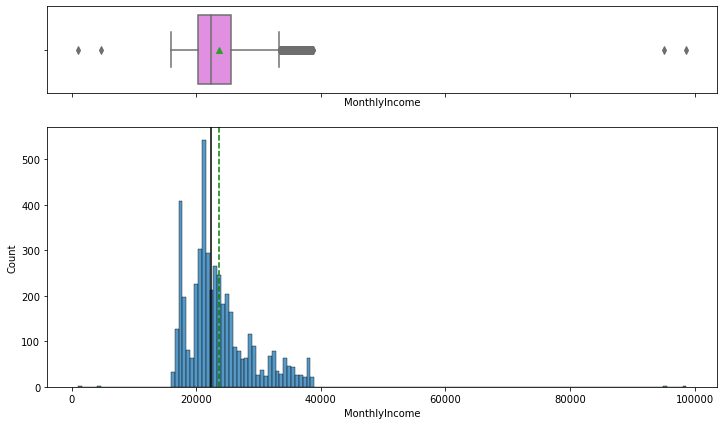

In [ ]:
histogram_boxplot(travel,'MonthlyIncome')

# Monthly Income is highly skewed. 
# Correct Outliers and then scale the column.


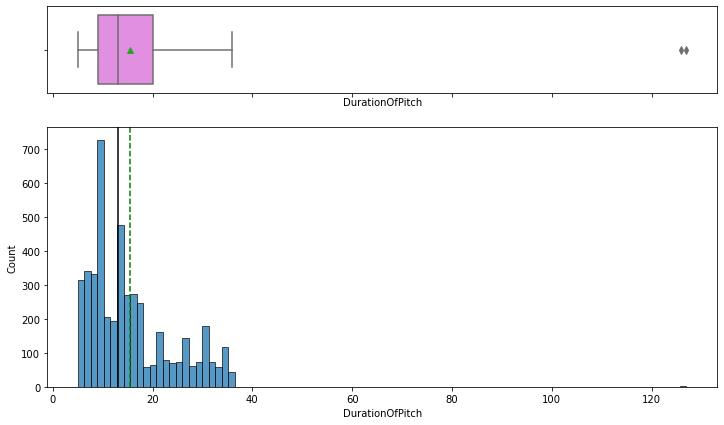

In [ ]:
histogram_boxplot(travel,'DurationOfPitch')

# DurationofPitch has extremevalues. Correct for outliers


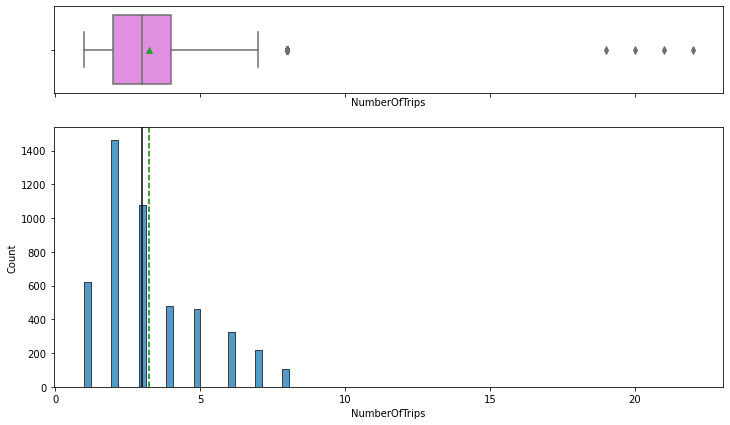

In [ ]:
histogram_boxplot(travel,'NumberOfTrips')

# There are outliers for NumberOfTrips Column

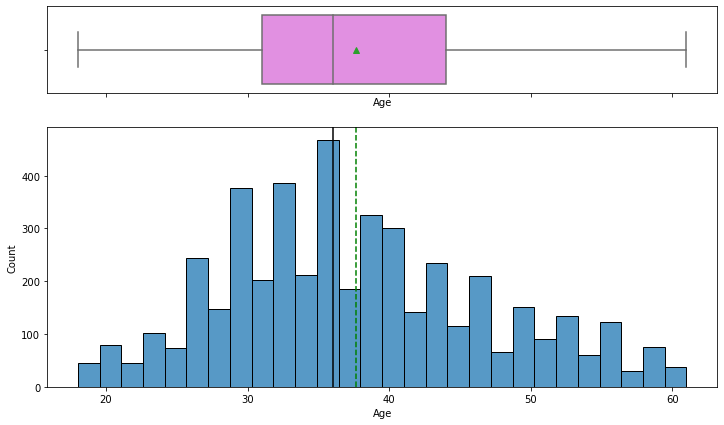

In [ ]:
histogram_boxplot(travel,'Age')

# Median Age of customers is ~ 37.

In [ ]:
travel.groupby('ProdTaken').Age.median()

ProdTaken
0    37.0
1    33.0
Name: Age, dtype: float64

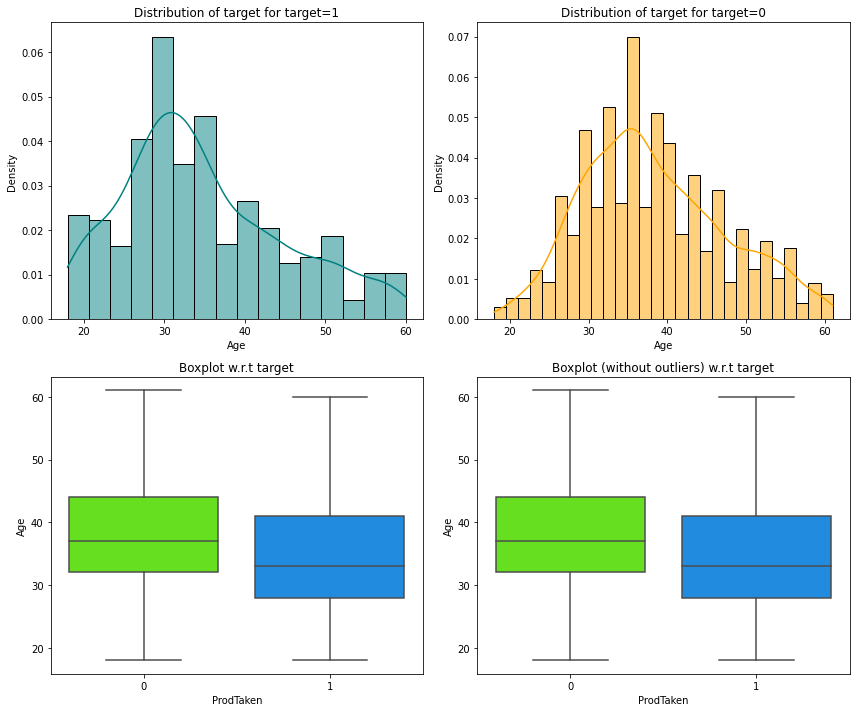

In [ ]:
distribution_plot_wrt_target(travel,'Age','ProdTaken')

# In customers who bought the package, the data is left skewed.
# The median age of people who bougth the package is less than the median age of people who did not buy the package.


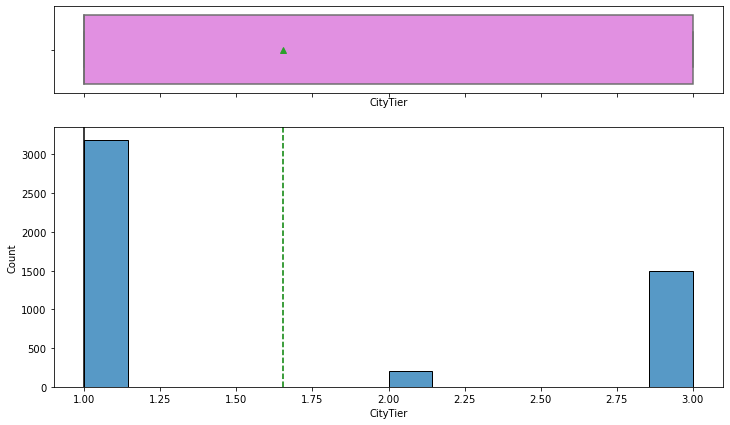

In [ ]:
histogram_boxplot(travel,'CityTier')

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


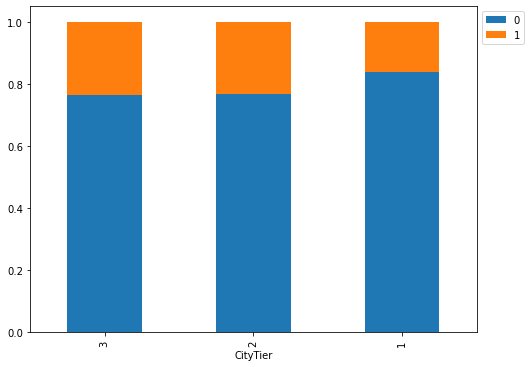

In [ ]:
stacked_barplot(travel,'CityTier','ProdTaken')

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


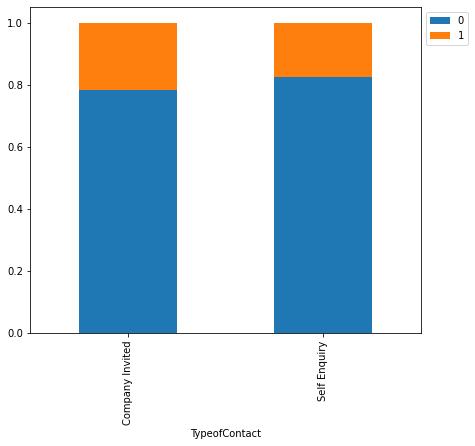

In [ ]:
stacked_barplot(travel,'TypeofContact','ProdTaken')
# When the contact is by Company, the chances of buying a product is better

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


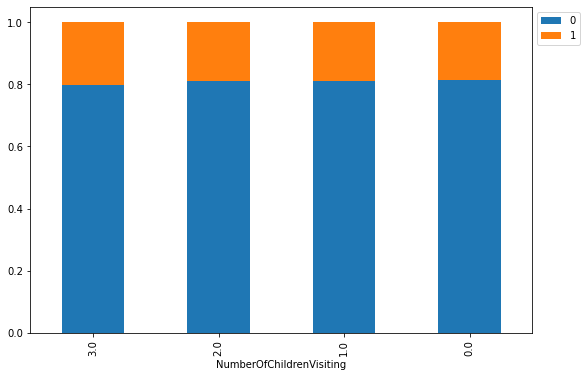

In [ ]:
stacked_barplot(travel,'NumberOfChildrenVisiting','ProdTaken')
# Children doesnt appear to make much difference 

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


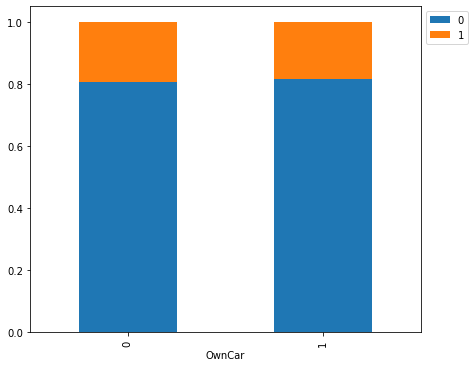

In [ ]:
stacked_barplot(travel,'OwnCar','ProdTaken')
# Having an owncar doesnt appear to make much difference 

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


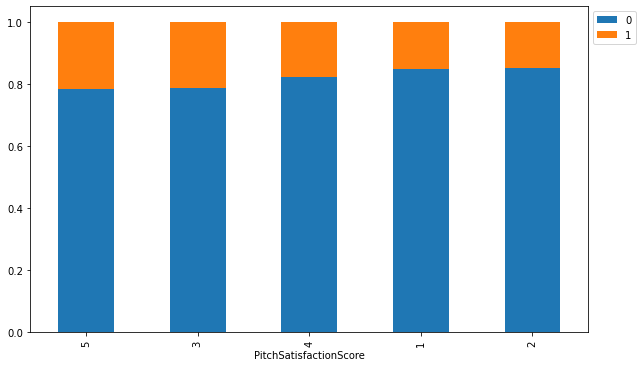

In [ ]:
stacked_barplot(travel,'PitchSatisfactionScore','ProdTaken')
# The higher the PitchSatisfcation score the better the chances of buying a Travel package.

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


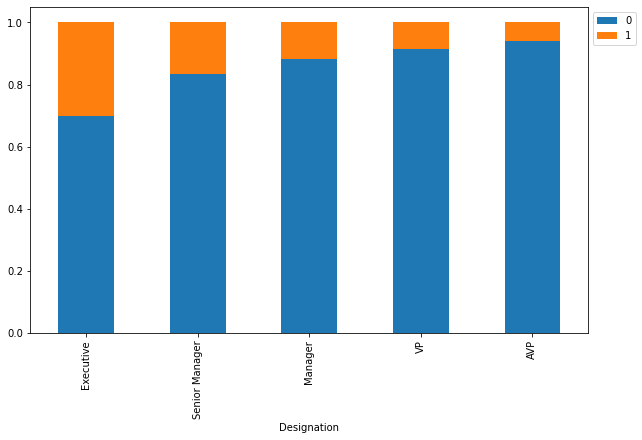

In [ ]:
stacked_barplot(travel,'Designation','ProdTaken')
# An Executive, senior manager or a manager have better chances to buy a travel package compared to a VP or AVP.

ProdTaken        0   1  All
MaritalStatus              
All            322  20  342
Single          72  10   82
Married        158   8  166
Unmarried        4   2    6
Divorced        88   0   88
------------------------------------------------------------------------------------------------------------------------


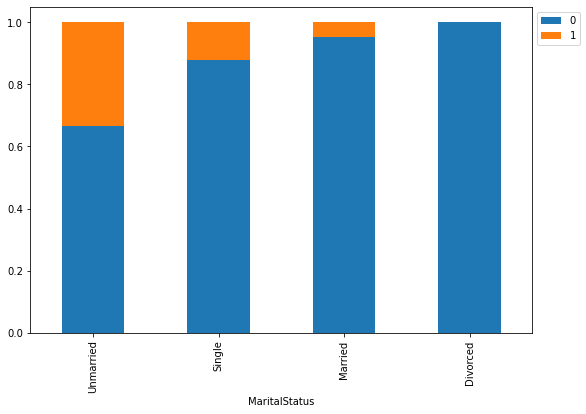

In [ ]:
avp = travel[travel['Designation'] == 'AVP' ]
stacked_barplot(avp,'MaritalStatus','ProdTaken')
# With in AVP, target Single or unmarried customers. They have a better chance of buying package  

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


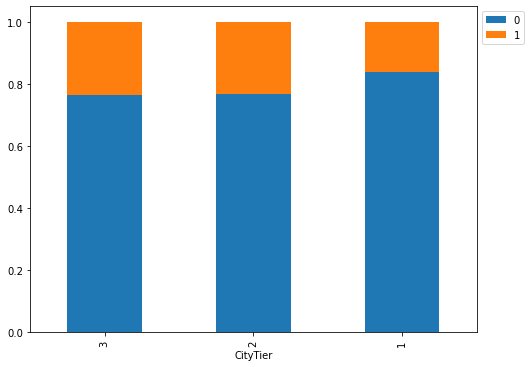

In [ ]:
stacked_barplot(travel,'CityTier','ProdTaken')

# 2nd and 3rd tier cities have a slightly better chance of buying a product

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

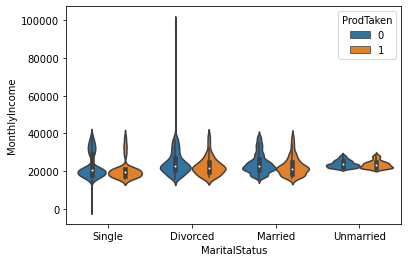

In [ ]:
sns.violinplot(travel['MaritalStatus'], travel['MonthlyIncome'], hue=travel['ProdTaken'])


ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


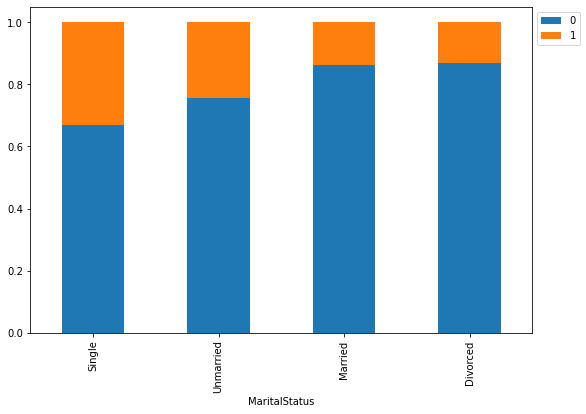

In [ ]:
stacked_barplot(travel, "MaritalStatus",'ProdTaken')

# Single and UnMarried customers are more likely to purchase compared to married and divorced customers.


In [ ]:
travel.groupby(["MaritalStatus","ProdTaken"]).MonthlyIncome.median()

# Median monthly income appears to be slightly lower for customers who bought the product.


MaritalStatus  ProdTaken
Divorced       0            22899.0
               1            21420.0
Married        0            22869.5
               1            21347.0
Single         0            20480.0
               1            19728.0
Unmarried      0            23507.5
               1            23255.0
Name: MonthlyIncome, dtype: float64

In [ ]:
travel.groupby(["ProductPitched","ProdTaken"]).DurationOfPitch.median()

# For basic, standard packages, the median pitch time is slightly higher when the product has been purchased.


ProductPitched  ProdTaken
Basic           0            13.0
                1            14.0
Deluxe          0            13.0
                1            16.0
King            0            11.0
                1             9.0
Standard        0            14.0
                1            17.0
Super Deluxe    0            12.0
                1            18.5
Name: DurationOfPitch, dtype: float64

<AxesSubplot:xlabel='ProductPitched', ylabel='DurationOfPitch'>

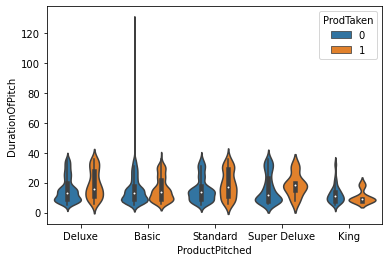

In [ ]:
sns.violinplot(travel['ProductPitched'], travel['DurationOfPitch'], hue=travel['ProdTaken'])

<AxesSubplot:xlabel='ProductPitched', ylabel='MonthlyIncome'>

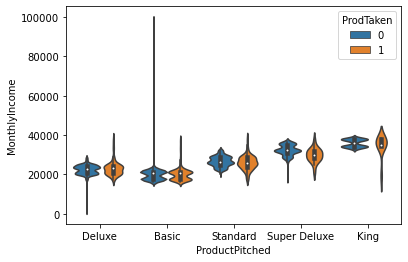

In [ ]:
sns.violinplot(travel['ProductPitched'], travel['MonthlyIncome'], hue=travel['ProdTaken'])


<AxesSubplot:xlabel='Designation', ylabel='MonthlyIncome'>

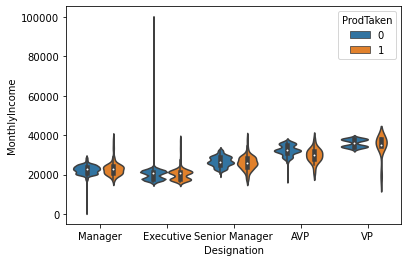

In [ ]:
sns.violinplot(travel['Designation'], travel['MonthlyIncome'], hue=travel['ProdTaken'])

Designation     AVP  Executive  Manager  Senior Manager   VP   All
ProductPitched                                                    
King              0          0        0               0  230   230
All             342       1842     1732             742  230  4888
Basic             0       1842        0               0    0  1842
Deluxe            0          0     1732               0    0  1732
Standard          0          0        0             742    0   742
Super Deluxe    342          0        0               0    0   342
------------------------------------------------------------------------------------------------------------------------


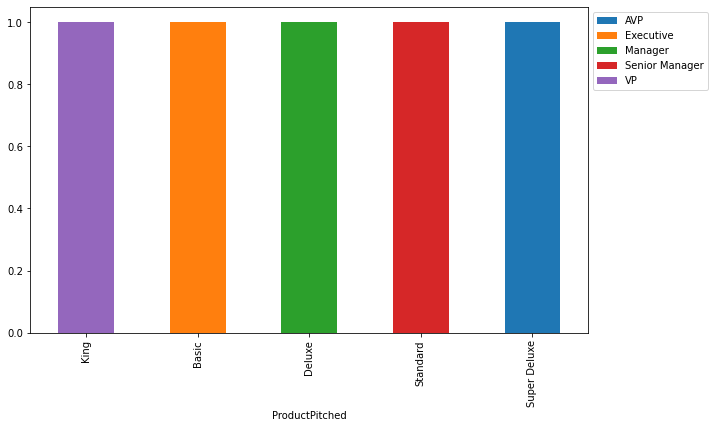

In [ ]:
stacked_barplot(travel,'ProductPitched','Designation')

<AxesSubplot:xlabel='ProductPitched', ylabel='MonthlyIncome'>

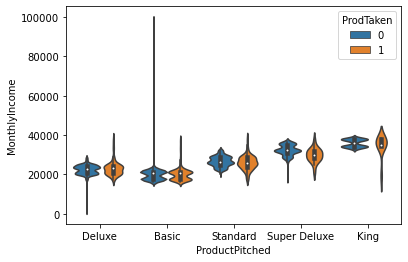

In [ ]:
sns.violinplot(travel['ProductPitched'], travel['MonthlyIncome'], hue=travel['ProdTaken'])


ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1500  317  1817
Fe Male     130   25   155
------------------------------------------------------------------------------------------------------------------------


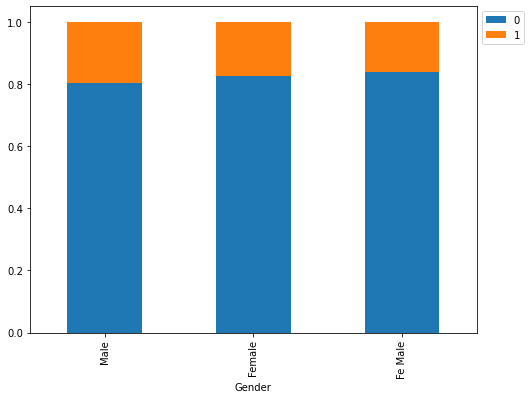

In [ ]:
stacked_barplot(travel,'Gender','ProdTaken')

# Male customers have a slightly higher likelihood to purchase the package.

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


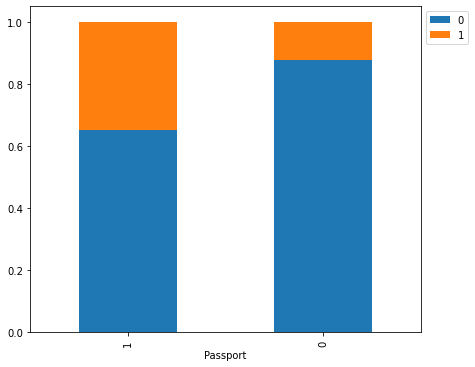

In [ ]:
stacked_barplot(travel,'Passport','ProdTaken')

# Customers with Passport have a better chance of taking a product than those that do not.

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


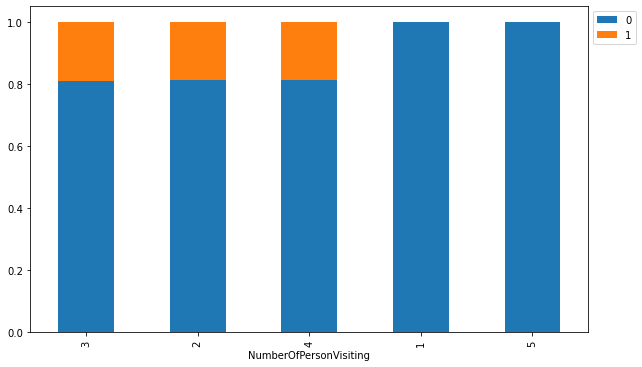

In [ ]:
stacked_barplot(travel, "NumberOfPersonVisiting",'ProdTaken')

# When # of poeple visiting are 2, 3,or 4 the chere are chances of buying a package. 

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


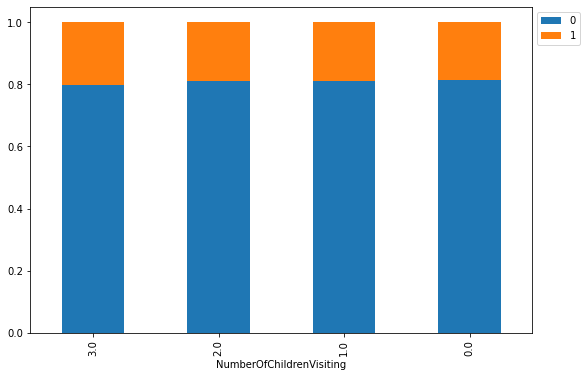

In [ ]:
stacked_barplot(travel, "NumberOfChildrenVisiting",'ProdTaken')

# Number of children doesnt appear to have a difference in the likelihood of product being purchased

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


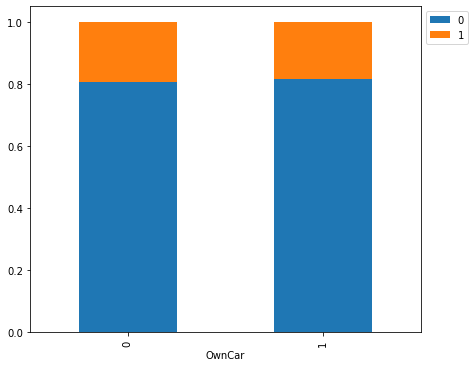

In [ ]:
stacked_barplot(travel, "OwnCar",'ProdTaken')

# Having an Owncar doenst appear to have a difference in the likelihood of product being purchased

Gender          Female  Male   All
Designation                       
All               1972  2916  4888
Manager            724  1008  1732
Executive          680  1162  1842
Senior Manager     326   416   742
AVP                160   182   342
VP                  82   148   230
------------------------------------------------------------------------------------------------------------------------


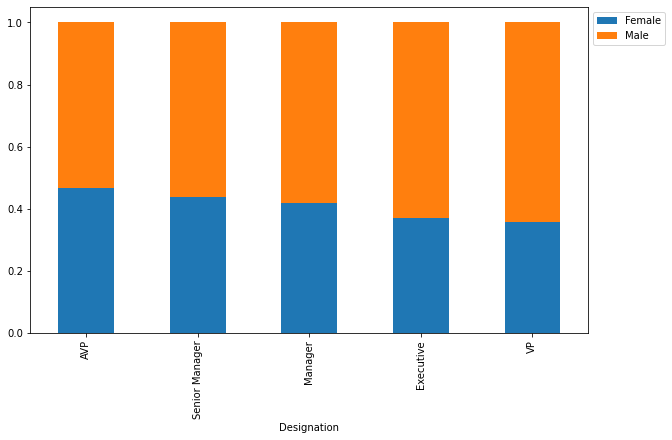

In [ ]:
stacked_barplot(travel, "Designation",'Gender')

# Male customers have a higher population within each segment

ProdTaken         0    1   All
NumberOfTrips                 
All            3840  908  4748
2.0            1165  299  1464
3.0             862  217  1079
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


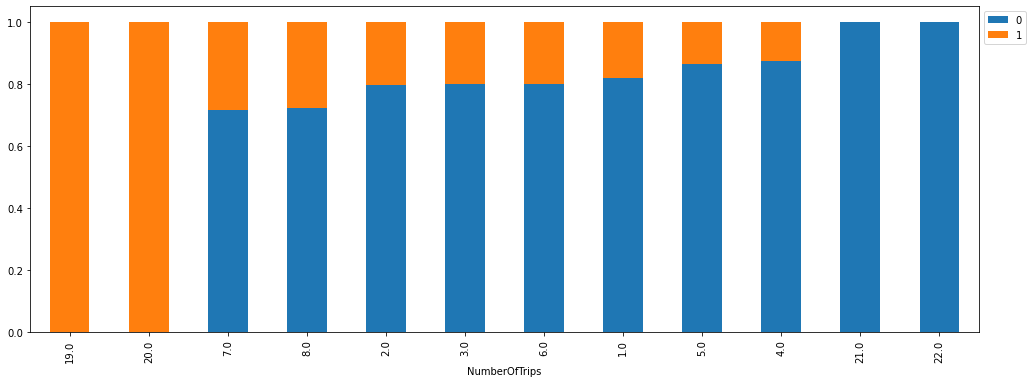

In [ ]:
travel.groupby("NumberOfTrips").ProdTaken.value_counts(normalize=True)

stacked_barplot(travel,'NumberOfTrips','ProdTaken')

# The percentage of customers who bought the package increases directionally along with the number of trips taken.

In [ ]:
travel.groupby(["ProductPitched","PreferredPropertyStar"]).ProdTaken.value_counts(normalize=True)

# Within basic and standard products, when the hotel property star is 4 or 5, the chances of buying a package is high.


ProductPitched  PreferredPropertyStar  ProdTaken
Basic           3.0                    0            0.747764
                                       1            0.252236
                4.0                    0            0.690217
                                       1            0.309783
                5.0                    0            0.560563
                                       1            0.439437
Deluxe          3.0                    0            0.895413
                                       1            0.104587
                4.0                    0            0.884615
                                       1            0.115385
                5.0                    0            0.838906
                                       1            0.161094
King            3.0                    0            0.956204
                                       1            0.043796
                4.0                    0            0.804878
                                    

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


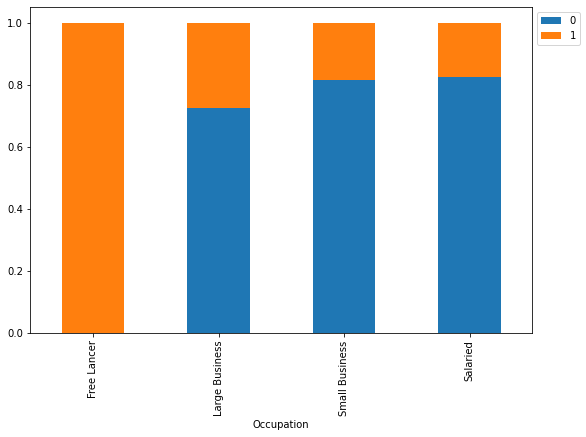

In [ ]:

stacked_barplot(travel,'Occupation','ProdTaken')
# Large business owners are slightly more likely to take the product.

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


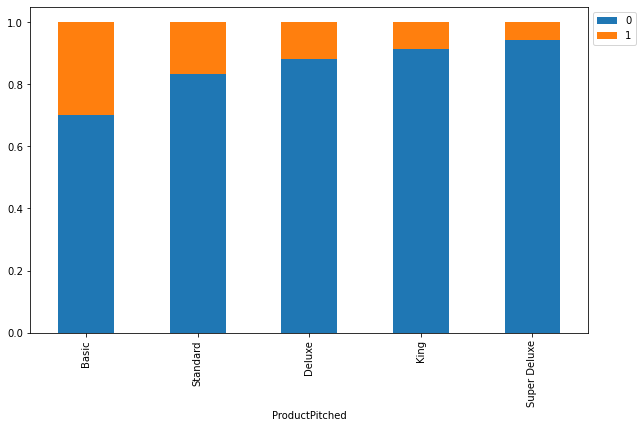

In [ ]:
stacked_barplot(travel, "ProductPitched", "ProdTaken")

In [ ]:
travel.groupby("NumberOfFollowups").ProdTaken.value_counts(normalize=True)

# the more the followups, the more chances of product being purchased.


NumberOfFollowups  ProdTaken
1.0                0            0.886364
                   1            0.113636
2.0                0            0.895197
                   1            0.104803
3.0                0            0.833561
                   1            0.166439
4.0                0            0.816731
                   1            0.183269
5.0                0            0.751302
                   1            0.248698
6.0                0            0.602941
                   1            0.397059
Name: ProdTaken, dtype: float64

<AxesSubplot:>

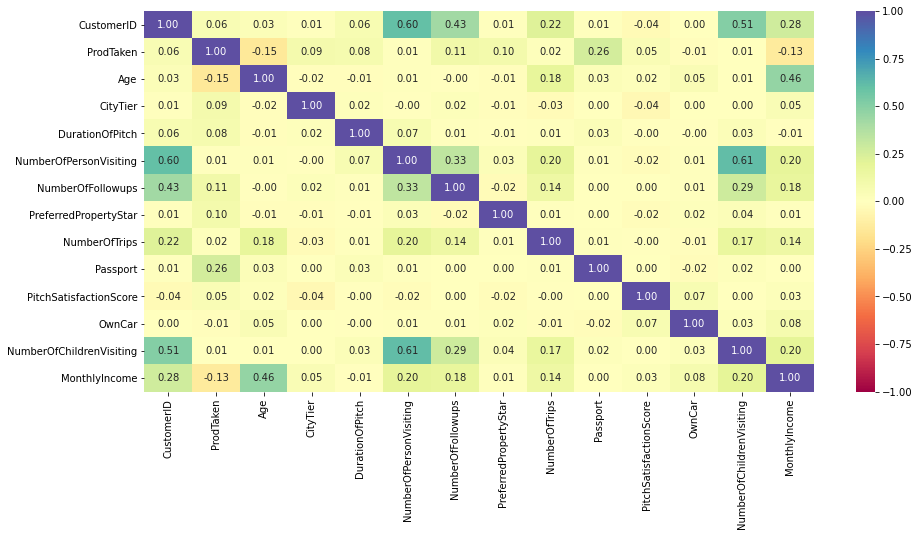

In [ ]:
# Correlation plot
plt.figure(figsize=(15, 7))
sns.heatmap(travel.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

Preliminary Observations of Data:
    
    Data Quality:
    i)   In Gender column , change the enumeration "Fe Male" to "Female"
    ii)  Outliers are observed in Monthly Income, Number of Trips, Duration Of Pitch columns. Treat for outliers.
    ii)  Recommended to scale the column monthly income using a standard scaler
    iii) Decision Tree classifiers cannot handle categorical variables. 
    One Hot Encode the columns : Designation, MaritalStatus, ProductPitched, Gender, Occupation , TypeofContact
    iv) replace missing values for Age, DurationOfPitch, NumberofFollowups, PreferredPropertyStar, NumberOfTrips,
        NumberofChildrenVisiting, MonthlyIncome with median values.
    
    Univariate and Bivariate Statistics:
    i) The median age of customers who purchase a package is slightly lower than those that do not. Higher age means less inclination to buy a package
    ii) Customers who were contacted by the company instead of self inquiry have a slightlt higher chance of buying a package
    iii) Customers who have a passport have a better chance to buy a package.
    iv) When hotels have a rating of 4 or 5, customers are more likely to buy package
    v) When the pitchsatisfaction score is higher , customers are more likely to buy package.
    vi) Single and Married customers have a slightly higher chance to buy package
    vii) Customers who were followedup more , are more likely to buy a package .
    viii) Basic and standard packages are more likely to buy a package.
    ix) Male customers have slightly higher likelihood to buy a package.
    x)Customers who took more trips are frequent travelers. They are more likely to buy a package
    xi) Customers from 2nd and 3rd tier cities are slightly more likely to buy a package
    xii) Customers who are managers, executives are more likely to buy a package.
    xiii) Numberof children under 5 yrs of age, or Own car status doesnt appear to be a deciding factor
    xiv) Customers who purchase package have slightly lower monthly income than those that do not.
    xv) Single and unmarried customers are likely to purchase travel packages.


###### DATA PRE-PROCESSING:

In [ ]:
data = travel

In [ ]:

data['Gender'] = data['Gender'].apply(lambda x : "Female" if x=="Fe Male" else x)

data['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [ ]:
# For  columns containing missing values, check the median value

missing_cols =['Age','DurationOfPitch','NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']

for i in missing_cols :
    print(i + " : " + str(travel[i].median()) )
    
    

Age : 36.0
DurationOfPitch : 13.0
NumberOfFollowups : 4.0
PreferredPropertyStar : 3.0
NumberOfTrips : 3.0
NumberOfChildrenVisiting : 1.0
MonthlyIncome : 22347.0


In [ ]:
# For columns with missing data, replace missing data with median.
missing_cols =['Age','DurationOfPitch','NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
               'NumberOfChildrenVisiting','MonthlyIncome']

for i in missing_cols :
    data[i].fillna((data[i].median()), inplace=True)
    

In [ ]:
data=data.drop('CustomerID',axis=1)

# Drop the customer id column

In [ ]:
data.isnull().sum()

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [ ]:
# Set a cap of income, DurationOfPitch,NumberofTripes

data = treat_outliers(data,'MonthlyIncome' )
data = treat_outliers(data,'DurationOfPitch')
data = treat_outliers(data,'NumberOfTrips')

In [ ]:
# Use Min MAX scaler to scale Monthly Income

minval=data['MonthlyIncome'].min(axis=0)
maxval=data['MonthlyIncome'].max(axis=0)

data['Monthly_scaled']= (data['MonthlyIncome']-minval )/(maxval-minval)


In [ ]:
data[['MonthlyIncome','Monthly_scaled']].head()

,MonthlyIncome,Monthly_scaled
0,20993.0,0.400710
1,20130.0,0.357034
2,17090.0,0.203180
3,17909.0,0.244629
4,18468.0,0.272920


In [ ]:
data = data.drop('MonthlyIncome',axis=1)

In [ ]:
#perform onehot encoding of selected categorical columns :

oneHotCols=["Designation", "MaritalStatus", "ProductPitched", "Gender","Occupation" , "TypeofContact"]

data=pd.get_dummies(data, columns=oneHotCols)

In [ ]:
# Verify the column changes :
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.000,0.000000,0.000,1.0
Age,4888.0,37.547259,9.104795,18.0,31.000,36.000000,43.000,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.000,1.000000,3.000,3.0
DurationOfPitch,4888.0,15.293576,7.938320,5.0,9.000,13.000000,19.000,34.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.000,3.000000,3.000,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.000,4.000000,4.000,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.000,3.000000,4.000,5.0
NumberOfTrips,4888.0,3.197218,1.704235,1.0,2.000,3.000000,4.000,7.0
Passport,4888.0,0.290917,0.454232,0.0,0.000,0.000000,1.000,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.000,3.000000,4.000,5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ProdTaken                      4888 non-null   int64  
 1   Age                            4888 non-null   float64
 2   CityTier                       4888 non-null   int64  
 3   DurationOfPitch                4888 non-null   float64
 4   NumberOfPersonVisiting         4888 non-null   int64  
 5   NumberOfFollowups              4888 non-null   float64
 6   PreferredPropertyStar          4888 non-null   float64
 7   NumberOfTrips                  4888 non-null   float64
 8   Passport                       4888 non-null   int64  
 9   PitchSatisfactionScore         4888 non-null   int64  
 10  OwnCar                         4888 non-null   int64  
 11  NumberOfChildrenVisiting       4888 non-null   float64
 12  Monthly_scaled                 4888 non-null   f

### Model Building : Create test train split

In [ ]:
X = data.drop("ProdTaken" , axis=1)
y = data.pop("ProdTaken")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

### Create Model performance measuring metrics.

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Bagging Classifier

In [ ]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

# The dependent variable being predicted has an uneven distribution. In such cases recall score is key metric.
# Bagging provides good recall score on training dataset but less recall score on test dataset.
# This  indicates overfitting on the training dataset.

Accuracy on training set :  0.9932768196433791
Accuracy on test set :  0.918200408997955
Recall on training set :  0.9658385093167702
Recall on test set :  0.644927536231884
Precision on training set :  0.9983948635634029
Precision on test set :  0.89


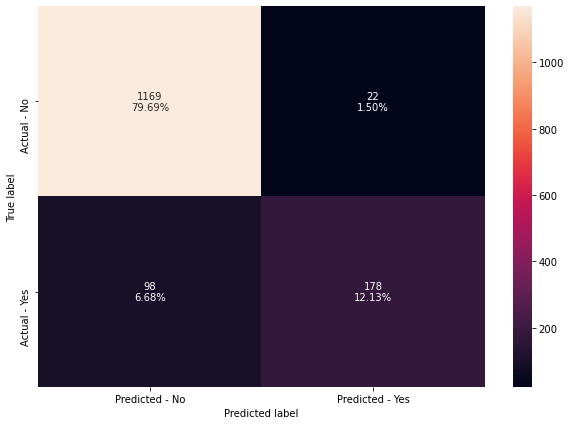

In [ ]:
make_confusion_matrix(bagging_estimator,y_test)



### Random Forest Classifier

In [ ]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9079754601226994
Recall on training set :  1.0
Recall on test set :  0.5507246376811594
Precision on training set :  1.0
Precision on test set :  0.9325153374233128


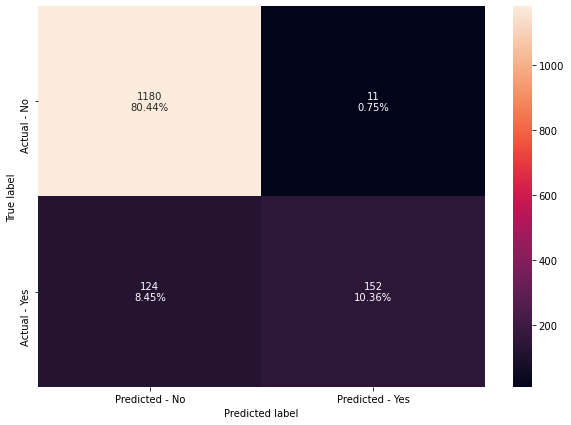

In [ ]:
make_confusion_matrix(rf_estimator,y_test)

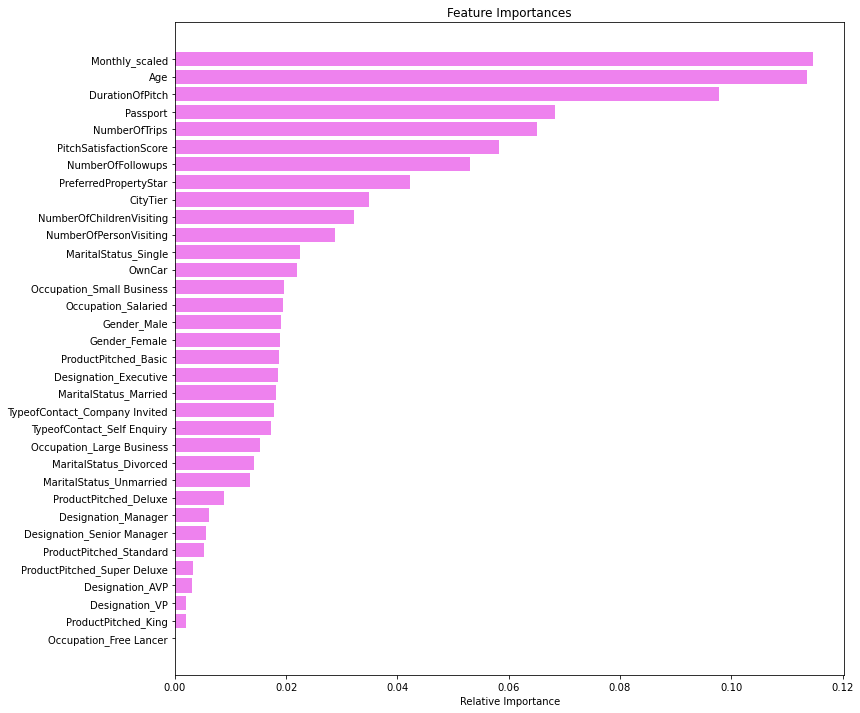

In [ ]:
# Check feature importances 

importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# Observations from random forest classifier and Bagging:
  i) Random forest classifier did not improve the recall score.
  ii) Based on feature importance : the most important features are :
         Monthly_Scaled, Age, Duration of pitch, Passport, Number of Trips and Pitch satisfaction score
  iii) Accuracy and precision score look good but recall score needs to be improved       
            

# Hyper Parameter Tuning : 

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [ ]:
bag_tuned_estimator_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9243353783231084
Recall on training set :  1.0
Recall on test set :  0.6521739130434783
Precision on training set :  1.0
Precision on test set :  0.9230769230769231


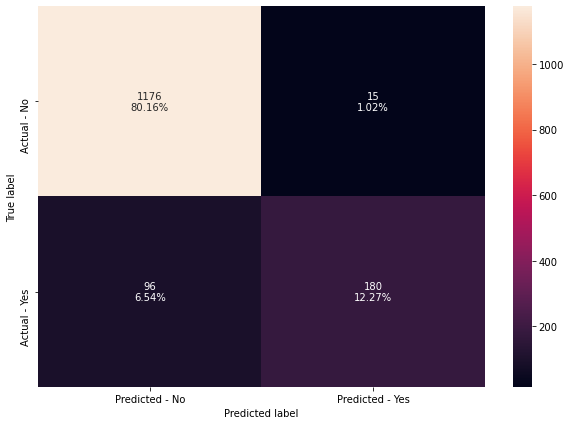

In [ ]:
# Tuned bagging classifier did not improve the recall score, 
make_confusion_matrix(bagging_estimator_tuned,y_test)

In [ ]:
# USing a different classifier for bagging instead of Decision Tree

bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [ ]:
bag_lr_estimator_score=get_metrics_score(bagging_lr)

# Logistic regression made recall score worse. It also reduced precision score.

Accuracy on training set :  0.8430283542823735
Accuracy on test set :  0.8404907975460123
Recall on training set :  0.2779503105590062
Recall on test set :  0.2753623188405797
Precision on training set :  0.7131474103585658
Precision on test set :  0.6909090909090909


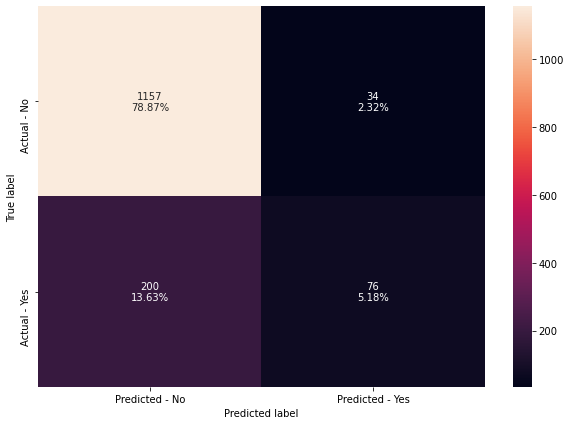

In [ ]:
make_confusion_matrix(bagging_lr,y_test)

In [ ]:
# Recall score for logistic regression is way too low . Hence it is not a good classifier for predicting customers 
# likely to buy travel package.


In [ ]:
# Hyper parameter tuning with random forest classifier.

# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [ ]:
rf_tuned_estimator_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9082139725226542
Accuracy on test set :  0.8752556237218814
Recall on training set :  0.5372670807453416
Recall on test set :  0.4166666666666667
Precision on training set :  0.9558011049723757
Precision on test set :  0.8394160583941606


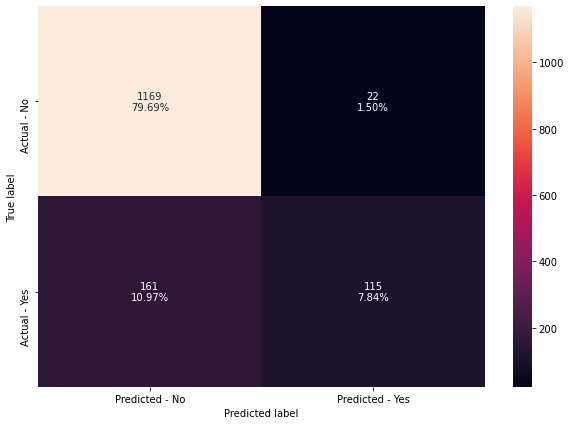

In [ ]:
make_confusion_matrix(rf_estimator_tuned,y_test)

# Random Forest Classifier with class weights :

In [ ]:
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=9,
                       n_estimators=200, random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.8918444899152295
Accuracy on test set :  0.8698023176550784
Recall on training set :  0.6444099378881988
Recall on test set :  0.532608695652174
Precision on training set :  0.7464028776978417
Precision on test set :  0.7033492822966507


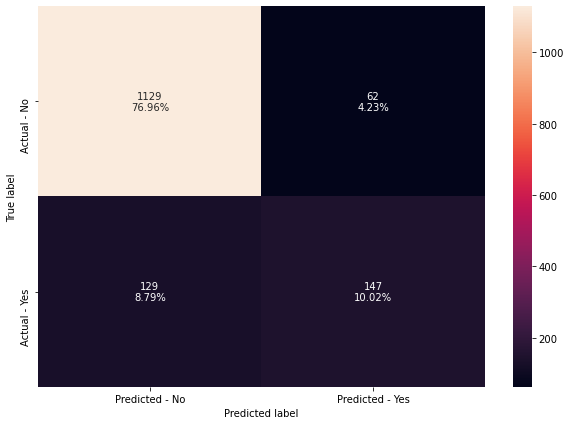

In [ ]:
make_confusion_matrix(rf_estimator_weighted,y_test)

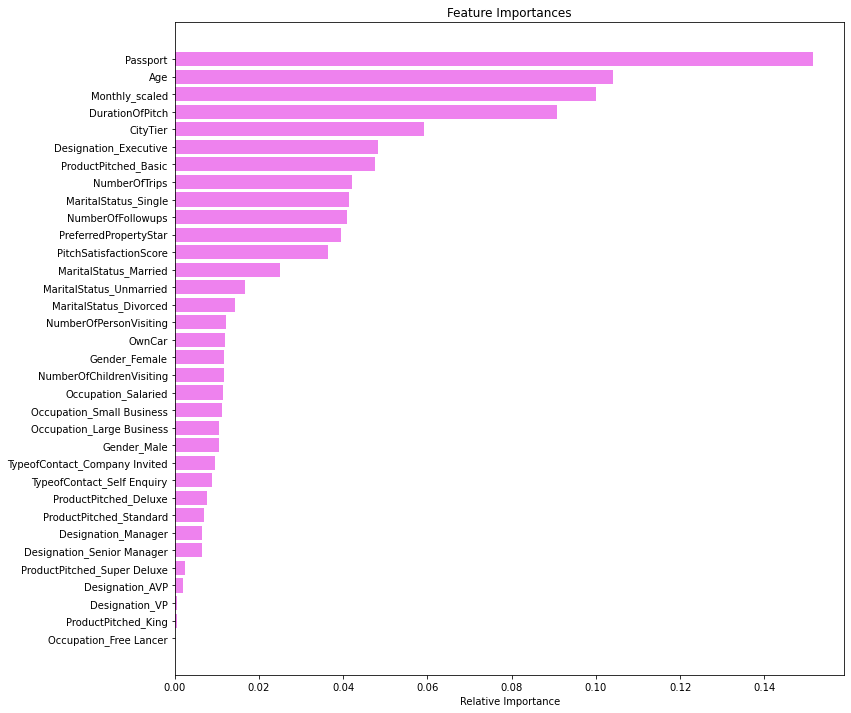

In [ ]:
# Check feature importances 

importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# compile all bagging estimator data into a comparison Data Frame:

# The bagging techniques used so far are :
#  1 : Bagging default (with a decision tree) 
#  2 : Random forest default 
#  3 : Bagging Tuned 
#  4 : Bagging with logistic regression
#  5 : Random forest tuned.   
#  6 : Random Forest tuned with weights.


lst_models = ['Bagging Default(Decision Tree)', 'Random Forest Default', 'Bagging Tuned', 'Random Forest Tuned', 'Bagging Logistic Regression' , 'Random Forest Weighted']
lst = [ bagging_estimator_score, rf_estimator_score, bag_tuned_estimator_score, rf_tuned_estimator_score, bag_lr_estimator_score, rf_estimator_weighted_score]

compare_bagging = pd.DataFrame(lst, index=lst_models,columns=['Accuracy-Train','Accuracy-Test','Recall-Train','Recall-Test','Precision-Train','Precision-Test'])
compare_bagging

In [ ]:
# Observations from bagging classifiers:
# Of all the models, bagging tuned provides the best recall score, 
# and logistic regression provides the worst recall score.



,Accuracy-Train,Accuracy-Test,Recall-Train,Recall-Test,Precision-Train,Precision-Test
Bagging Default(Decision Tree),0.993277,0.918200,0.965839,0.644928,0.998395,0.890000
Random Forest Default,1.000000,0.907975,1.000000,0.550725,1.000000,0.932515
Bagging Tuned,1.000000,0.924335,1.000000,0.652174,1.000000,0.923077
Random Forest Tuned,0.908214,0.875256,0.537267,0.416667,0.955801,0.839416
Bagging Logistic Regression,0.843028,0.840491,0.277950,0.275362,0.713147,0.690909
Random Forest Weighted,0.891844,0.869802,0.644410,0.532609,0.746403,0.703349


In [ ]:
# Boosting data 
# Use AdaBoost,  Gradient Boost,  XGBoost techniques on the train and test datasets.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
from xgboost import XGBClassifier

#BOOSTING: AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
abc_estimator_score=get_metrics_score(abc)

Accuracy on training set :  0.8465361005553932
Accuracy on test set :  0.8466257668711656
Recall on training set :  0.3198757763975155
Recall on test set :  0.322463768115942
Precision on training set :  0.7030716723549488
Precision on test set :  0.7007874015748031


# Gradient Boost classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
gbc_estimator_score=get_metrics_score(gbc)

Accuracy on training set :  0.8824904998538439
Accuracy on test set :  0.8684389911383776
Recall on training set :  0.43788819875776397
Recall on test set :  0.40217391304347827
Precision on training set :  0.8757763975155279
Precision on test set :  0.7985611510791367


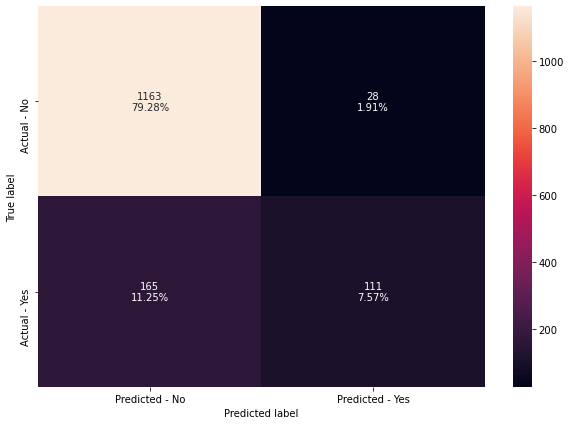

In [ ]:
make_confusion_matrix(gbc,y_test)


Both Adaptive Boosting and Gradient boosting classifiers do not appear to do a good job looking at metrics such as recall score, precision ,and accuracy scores.  Recall is the score to look for, and both models are bad.

In [ ]:
# XGB CLASSIFIER

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9311520109066121
Recall on training set :  0.9984472049689441
Recall on test set :  0.7101449275362319
Precision on training set :  1.0
Precision on test set :  0.9032258064516129


In [ ]:
#XGBoost provides the best recall score of all techniques so far.

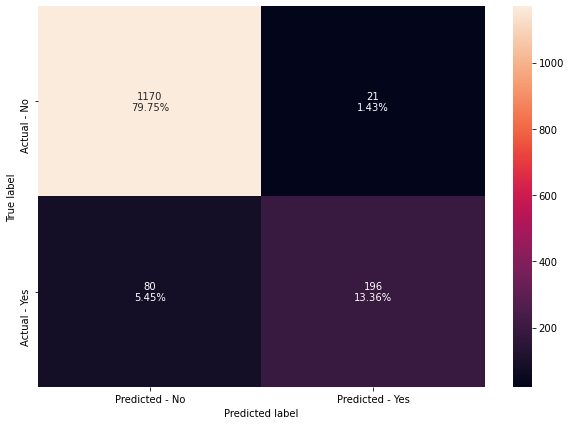

In [ ]:
make_confusion_matrix(xgb,y_test)

Hyperparameter Tuning: AdaBoost Classifier

In [ ]:
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.1, n_estimators=100, random_state=1)

In [ ]:
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9891844489915229
Accuracy on test set :  0.8773006134969326
Recall on training set :  0.953416149068323
Recall on test set :  0.5905797101449275
Precision on training set :  0.9887278582930756
Precision on test set :  0.7086956521739131


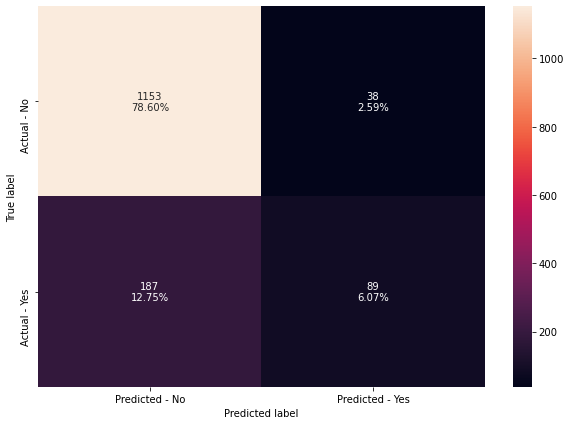

In [ ]:
make_confusion_matrix(abc,y_test)

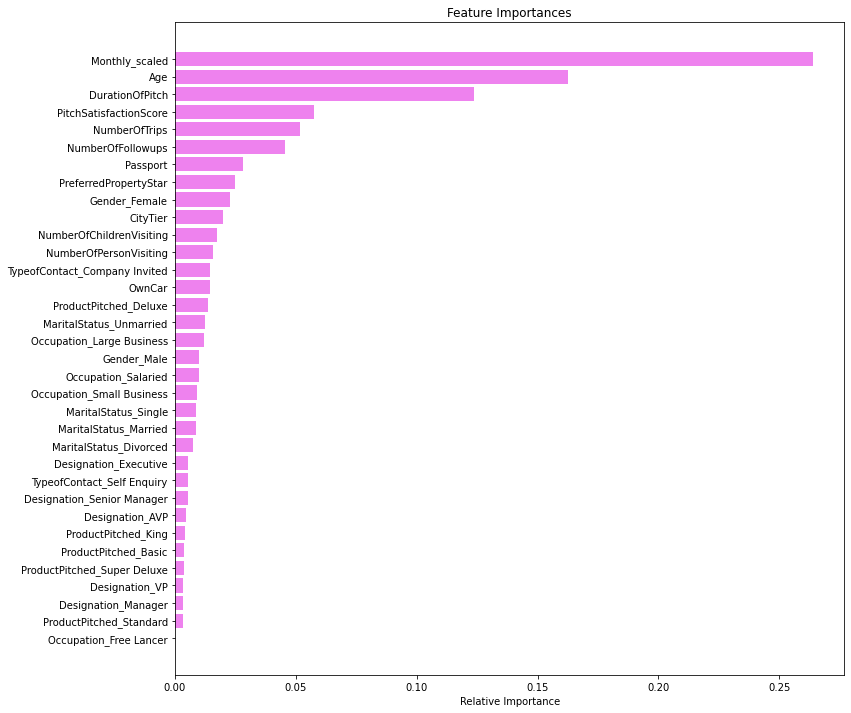

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Hyperparameter Tuning :  Gradient Boost classifier

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

In [ ]:
gbc_tuned_score=get_metrics_score(gbc_tuned)

# Recall score is still bad on test set.

Accuracy on training set :  0.9207833966676411
Accuracy on test set :  0.8827539195637355
Recall on training set :  0.6149068322981367
Recall on test set :  0.48188405797101447
Precision on training set :  0.9451073985680191
Precision on test set :  0.8209876543209876


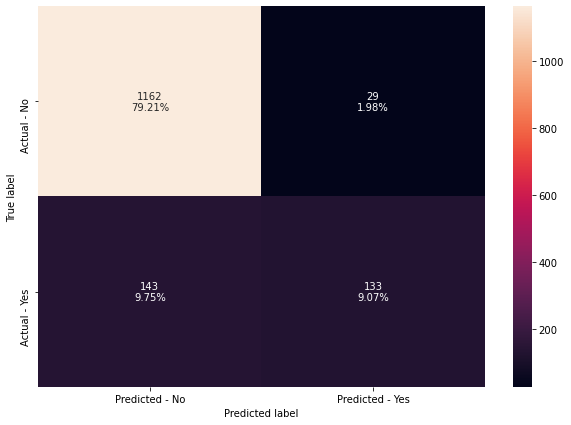

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

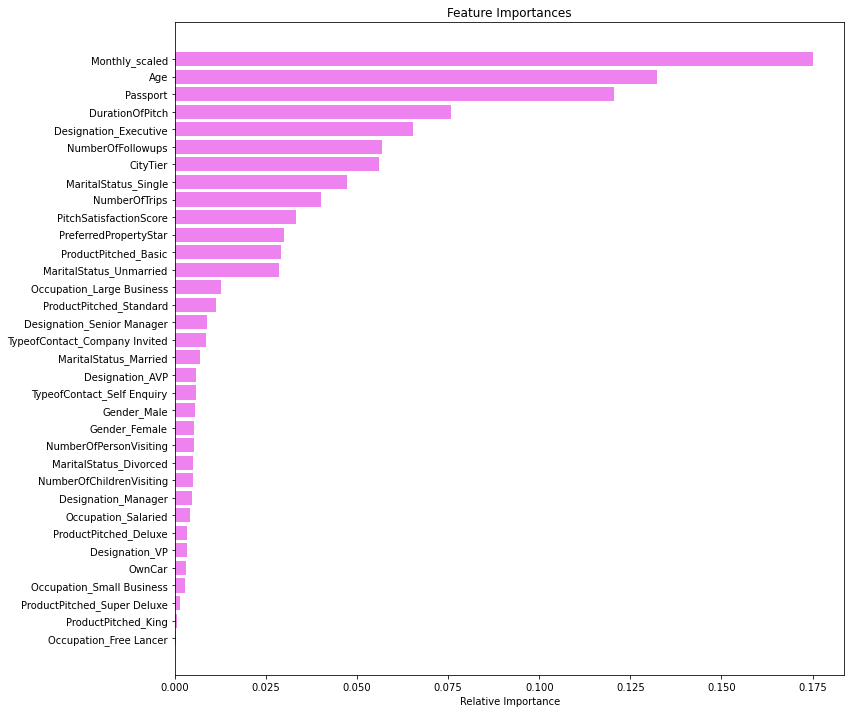

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# STACKING CLASSIFIER :

In [ ]:
estimators = [('Random Forest',rf_estimator_tuned), ('Gradient Boosting',gbc_tuned)]

final_estimator = xgb

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=200,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.9))],
                   final_estim...
                                                 importance_ty

In [ ]:
stacking_score=get_metrics_score(stacking_classifier)

# Stacking classifier uses a combination of Gradient Boosting, random forest, and uses XGB as final classifier.

Accuracy on training set :  0.9082139725226542
Accuracy on test set :  0.8629856850715747
Recall on training set :  0.6459627329192547
Recall on test set :  0.4855072463768116
Precision on training set :  0.8286852589641435
Precision on test set :  0.694300518134715


In [ ]:
# compile all boosting estimator data into a comparison Data Frame:

# The boosting techniques used so far are :
#  1 : ADABOOST default (with a decision tree) 
#  2 : Gradient boost method default 
#  3:  XGB default  
#  4:  ADABoost tuned 
#  5 : Gradient boost tuned
#  6 : Stacking classifier


lst_models = ['AdaBoost Default', 'Gradient Boost Default', 'XGB Default', 
              'AdaBoostTuned', 'Gradient Boost Tuned','Stacking Classifier']
lst = [abc_estimator_score, gbc_estimator_score, xgb_score, abc_tuned_score, gbc_tuned_score,stacking_score]

compare_boosting = pd.DataFrame(lst, index=lst_models,
                                columns=['Accuracy-Train','Accuracy-Test','Recall-Train','Recall-Test','Precision-Train','Precision-Test'])


In [ ]:
compare_boosting

,Accuracy-Train,Accuracy-Test,Recall-Train,Recall-Test,Precision-Train,Precision-Test
AdaBoost Default,0.846536,0.846626,0.319876,0.322464,0.703072,0.700787
Gradient Boost Default,0.882490,0.868439,0.437888,0.402174,0.875776,0.798561
XGB Default,0.999708,0.931152,0.998447,0.710145,1.000000,0.903226
AdaBoostTuned,0.989184,0.877301,0.953416,0.590580,0.988728,0.708696
Gradient Boost Tuned,0.920783,0.882754,0.614907,0.481884,0.945107,0.820988
Stacking Classifier,0.908214,0.862986,0.645963,0.485507,0.828685,0.694301


In [ ]:
# combining both bagging and boosting models.

combined_models = pd.concat([compare_bagging, compare_boosting])

combined_models.reset_index()

,index,Accuracy-Train,Accuracy-Test,Recall-Train,Recall-Test,Precision-Train,Precision-Test
0,Bagging Default(Decision Tree),0.993277,0.918200,0.965839,0.644928,0.998395,0.890000
1,Random Forest Default,1.000000,0.907975,1.000000,0.550725,1.000000,0.932515
2,Bagging Tuned,1.000000,0.924335,1.000000,0.652174,1.000000,0.923077
3,Random Forest Tuned,0.908214,0.875256,0.537267,0.416667,0.955801,0.839416
4,Bagging Logistic Regression,0.843028,0.840491,0.277950,0.275362,0.713147,0.690909
5,Random Forest Weighted,0.891844,0.869802,0.644410,0.532609,0.746403,0.703349
6,AdaBoost Default,0.846536,0.846626,0.319876,0.322464,0.703072,0.700787
7,Gradient Boost Default,0.882490,0.868439,0.437888,0.402174,0.875776,0.798561
8,XGB Default,0.999708,0.931152,0.998447,0.710145,1.000000,0.903226
9,AdaBoostTuned,0.989184,0.877301,0.953416,0.590580,0.988728,0.708696


#Conclusion

- The dependent variable is package purchase indicator.  The percentage of customers who buy the package is quite  lower than the percentage of customers who do not buy the customers. The distribution is disproportionate.
- A false positive is identification of customers that are not likely to buy the package ,as potential customers. Reaching out to them is going to involve marketing cost.
- On the other hand a false negative is not identifying true potential customer, when they are likely to buy a package. Missing them out from marketing campaign would be a revenue loss. 
- The cost function between FP and FN drives the metric to be chosen. In this case FN has more cost. POtential revenue loss is higher than marketing cost.
- As we know, recall is calculated as TP/(TP + FN), minimizing FN should be the priority. 
  -  Out of all the bagging models, tuned bagging has the higher recall score, while maintaining accuracy and precision well. 
  -  Out of all the boosting models (excluding tuned XG boosting),   XGBoost has the highest recall score.
  - Out of all the bagging and boosting models, XG BOOST is the best performer. It has good accuracy, precision, recall scores on both test and train datasets
  
Drivers of model performance:
The top factors influencing package purchase prediction are:
		i) Monthly Income
		ii)Age 
		iii)DurationofPitch
		iv)PitchSatisfactionSCore
		v)Numberoffollowups
		vi)Passport
		vii) Preferred Property star.	


Business recommendation:
-  Basic package is offered to Executives, Standard Package customers are Managers, Deluxe package customers are Senior managers, SuperDeluxe package customers are AVP’s, King package customers are VPs. Executives and Managers are at the lower end of pay scale. Since basic, standard , and deluxe packages have a higher package purchase  rate, compared to king and super deluxe, business should target their market more towards these low-end customers.
- Within higher end desiginations such as AVP/VP, target single and unmarried customers. Avoid married,divorced customers in Super Deluxe and King Packages.
- Age less than 35 are more likely to purchase package, hence they should be targeted more. Lower age indciates a tendency to travel.
- The ideal pitch time should be between 15 and 20 mins for a positive outcome. Long pitches can backfire.
- Customers who have passports should be targeted for marketing campaigns.
- Additional followups return in a positive outcome. Hence repeat calls are recommended.
- When building packages, only those hotels with higher rating should be used.
- Large business owners are more likely to buy packages. Target those customers.
- Company Invited customers have a better chance to buy packages rather than self inquiry customers. Hence send invites to prospective customers.
